In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import tensorflow as tf

 # Regression with Large Dataset

In [3]:
# create dataset with a million points 
x_data = np.linspace(0.0,10.0,1000000)

In [4]:
# add some noise to the data set
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 0.07317179,  0.99884345,  0.82199232, ..., -0.39814122,
       -1.22692698, -2.28723358])

### y = mx + b


### b =5

In [6]:
y_true = (0.5 * x_data) + 5 +noise

In [7]:
#we have created our own line with a bit of noise to make it a bit difficut for the NN
# create pandas data frame for operatons 
x_df = pd.DataFrame(data = x_data,columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data = y_true,columns=['Y'])

In [9]:
#.head funtion gives the first 5 rows of the data frame
x_df.head()


,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
y_df.head()

,Y
0,5.073172
1,5.998848
2,5.822002
3,3.363709
4,4.705459


In [11]:
# pandas help with concatinating lists 
# concatinate the two lists 
# second parameter tells along which axes you want ot concat ,here it is by column
my_data = pd.concat([x_df,y_df],axis=1)

In [12]:
my_data

,X Data,Y
0,0.00000,5.073172
1,0.00001,5.998848
2,0.00002,5.822002
3,0.00003,3.363709
4,0.00004,4.705459
5,0.00005,6.097428
6,0.00006,4.193841
7,0.00007,5.622782
8,0.00008,4.216657
9,0.00009,4.841016


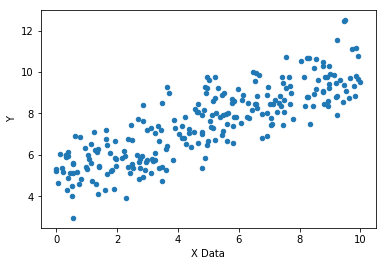

In [13]:
# plotting this whole thing would crash the kernel so pandas help in sampling and plotting it
# this function returns random 250 pair of points
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [14]:
# you cant feed a millions points at once so you feed in batches od data

In [15]:
np.random.randn(2)

array([-0.14319632,  0.29478609])

In [16]:
batch_size = 8 #you pass 8 samples at a time
# initialize with some random value m,b
m = tf.Variable(-0.26)
b = tf.Variable(1.37)

In [17]:
# create placeholders
# input place holder is how many samples are you passing ,here it is batch size
xph = tf.placeholder(tf.float32,[batch_size])

In [18]:
yph = tf.placeholder(tf.float32,[batch_size])

In [19]:
y_model = m * xph + b # this is your model

In [20]:
# loss function
error = tf.reduce_sum(tf.square(yph-y_model))

In [21]:
# time for optimization
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [22]:
init =tf.global_variables_initializer()

In [23]:
# this is used to create a random set of 8 points from the whole data set
rand_int = np.random.randint(len(x_data),size=batch_size)
rand_int
x_data[rand_int]
y_true[rand_int]

array([ 8.32012721,  9.18733396,  5.87631968, 10.05866455,  5.61916743,
        7.57864906,  8.54708908,  7.34495866])

In [24]:
with tf.Session() as sess:
    
    sess.run(init)
    # can play along with this
    batches = 2000
    
    for i in range(batches):
        
        rand_int = np.random.randint(len(x_data),size=batch_size)
       
        feed={xph:x_data[rand_int],yph:y_true[rand_int]}
    
        sess.run(train,feed_dict=feed)
    
    model_m ,model_b =sess.run([m,b])

In [25]:
model_m

0.46720454

In [26]:
model_b

5.0054116

In [27]:
y_hat = x_data * model_m +model_b

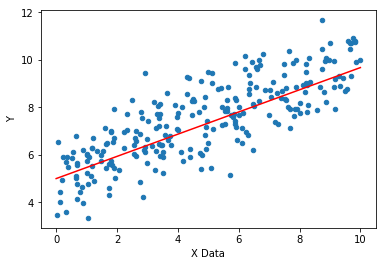

In [28]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# This ends the simple regression part
# There is an estimator API
# basically use them for Classification and Regression 
# Steps to do so:
### Define a list of Features Colums
### Create the estimator Model
### Create a Data Input Function
### Call train,evaluate and Predict methods on the estimator object

##### Create a Feature column

In [29]:
# this model has only one feature which consists of numeric data
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

#### Here you create an estimator  

estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jaish\\AppData\\Local\\Temp\\tmpyk_xoizh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001741DC4A1D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# eval is same as test cases
x_train , x_eval , y_train , y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)
# usuall train is 70% of the whole data

In [33]:
print(x_train.shape)

(700000,)


In [34]:
x_eval.shape

(300000,)

In [35]:
# setup estimator inputs this is important
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [36]:
# 2 more input function for evaluation Shuffle is false cause using this 
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [37]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [38]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jaish\AppData\Local\Temp\tmpyk_xoizh\model.ckpt.
INFO:tensorflow:loss = 544.7846, step = 1
INFO:tensorflow:global_step/sec: 1152.51
INFO:tensorflow:loss = 4.574394, step = 101 (0.088 sec)
INFO:tensorflow:global_step/sec: 1617.16
INFO:tensorflow:loss = 44.10292, step = 201 (0.061 sec)
INFO:tensorflow:global_step/sec: 1643.79
INFO:tensorflow:loss = 8.7107315, step = 301 (0.062 sec)
INFO:tensorflow:global_step/sec: 1591.55
INFO:tensorflow:loss = 15.102146, s

In [39]:
# get the metrics on our training data

In [40]:
# input is the one which is not shuffled 
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-12:03:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaish\AppData\Local\Temp\tmpyk_xoizh\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-03-12:03:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0734954, global_step = 1000, label/mean = 7.5026097, loss = 8.587963, prediction/mean = 7.37226
INFO:tensorflow:Saving 'checkpoint_path' 

In [41]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-03-12:03:47
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaish\AppData\Local\Temp\tmpyk_xoizh\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-11-03-12:03:48
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0656375, global_step = 1000, label/mean = 7.4785457, loss = 8.5251, prediction/mean = 7.350972
INFO:tensorflow:Saving 'checkpoint_path' s

##### compare training data and test data metrics got in the previous steps

In [42]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0734954, 'label/mean': 7.5026097, 'loss': 8.587963, 'prediction/mean': 7.37226, 'global_step': 1000}


In [43]:
print('Test Data Metrics')
print(eval_metrics)

Test Data Metrics
{'average_loss': 1.0656375, 'label/mean': 7.4785457, 'loss': 8.5251, 'prediction/mean': 7.350972, 'global_step': 1000}


In [44]:
brand_new_data = np.linspace(0,10,10)

In [45]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [46]:
list(estimator.predict(input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaish\AppData\Local\Temp\tmpyk_xoizh\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.425364], dtype=float32)},
 {'predictions': array([5.079934], dtype=float32)},
 {'predictions': array([5.734504], dtype=float32)},
 {'predictions': array([6.389074], dtype=float32)},
 {'predictions': array([7.043644], dtype=float32)},
 {'predictions': array([7.6982136], dtype=float32)},
 {'predictions': array([8.352784], dtype=float32)},
 {'predictions': array([9.007354], dtype=float32)},
 {'predictions': array([9.661924], dtype=float32)},
 {'predictions': array([10.316494], dtype=float32)}]

In [47]:
predictions = []

for pred in estimator.predict(input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaish\AppData\Local\Temp\tmpyk_xoizh\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [48]:
predictions

[array([4.425364], dtype=float32),
 array([5.079934], dtype=float32),
 array([5.734504], dtype=float32),
 array([6.389074], dtype=float32),
 array([7.043644], dtype=float32),
 array([7.6982136], dtype=float32),
 array([8.352784], dtype=float32),
 array([9.007354], dtype=float32),
 array([9.661924], dtype=float32),
 array([10.316494], dtype=float32)]

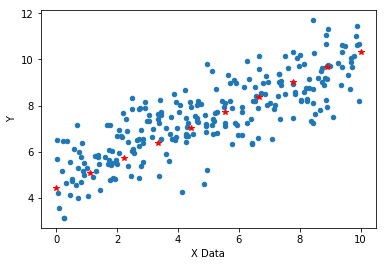

In [49]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')